# Setup

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import ast
import seaborn as sns

In [2]:
results_df = pd.read_csv('../../data/topic_model_results.csv',  lineterminator='\n', encoding='utf8')

In [3]:
results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,hateful Score,hateful HR,toxic Score,toxic HR\r,Topic Number,Topic\r
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political\r
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships\r
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships\r
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime\r
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown\r


In [4]:
# Remove \r from column names
results_df.columns = results_df.columns.str.strip()

# Strip \r and other whitespace characters from a specific column (e.g., 'column_name')
results_df['Topic'] = results_df['Topic'].str.strip()

results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful Score,hateful HR,toxic Score,toxic HR,Topic Number,Topic
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown


In [5]:
# rename new columns
results_df.rename(columns={
    'hateful Score': 'hateful_score',
    'hateful HR': 'hateful_prediction',
    'toxic Score': 'toxic_score',
    'toxic HR': 'toxic_prediction',
    'Topic Number': 'topic_number',
    'Topic': 'topic'
}, inplace=True)

results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic
0,i think most singaporeans dont give a damn who...,11/4/2020 15:49,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political
1,fair point the secrecy aspect of it slipped my...,3/4/2020 9:59,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships
2,range,15/2/2020 15:07,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships
3,gt this is binary thinking because you think t...,4/6/2020 7:07,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime
4,boo boo poor u lmao,31/10/2020 13:52,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown


In [6]:
results_df['moderation'] = results_df['moderation'].apply(ast.literal_eval)

In [7]:
# Create boolean flags for collapsed, deleted, low-score, removed, and controversial comments
results_df['is_collapsed'] = results_df['moderation'].apply(lambda x: x.get('collapsed') == True)
results_df['is_deleted'] = results_df['moderation'].apply(lambda x: x.get('collapsed_reason_code') == 'DELETED')
results_df['is_controversial'] = results_df['moderation'].apply(lambda x: x.get('controversiality') == 1)

In [8]:
results_df['is_controversial'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_controversial, dtype: bool

In [9]:
# convert data to appropriate datatypes
results_df['text'] = results_df['text'].astype(str)
results_df['timestamp'] = pd.to_datetime(results_df['timestamp'], format='%d/%m/%Y %H:%M')
results_df['username'] = results_df['username'].astype(str)
results_df['link'] = results_df['link'].astype(str)
results_df['link_id'] = results_df['link_id'].astype(str)
results_df['parent_id'] = results_df['parent_id'].astype(str)
results_df['id'] = results_df['id'].astype(str)
results_df['subreddit_id'] = results_df['subreddit_id'].astype(str)
results_df['moderation'] = results_df['moderation'].tolist()
results_df['hateful_score'] = results_df['hateful_score'].astype('float32')
results_df['hateful_prediction'] = results_df['hateful_prediction'].astype('int16')
results_df['toxic_score'] = results_df['toxic_score'].astype('float32')
results_df['toxic_prediction'] = results_df['toxic_prediction'].astype('int16')
results_df['topic_number'] = results_df['topic_number'].astype('category')
results_df['topic'] = results_df['topic'].astype('category')

In [10]:
# Group by year and month to track moderation actions over time
results_df['year_month'] = results_df['timestamp'].dt.to_period('M')

# extract date from datetime stamp
results_df['timestamp'] = results_df['timestamp'].dt.date

results_df['timestamp'].head()

0    2020-04-11
1    2020-04-03
2    2020-02-15
3    2020-06-04
4    2020-10-31
Name: timestamp, dtype: object

# 1. Difference between hatefulness and toxicity

In [11]:
results_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,hateful_score,hateful_prediction,toxic_score,toxic_prediction,topic_number,topic,is_collapsed,is_deleted,is_controversial,year_month
0,i think most singaporeans dont give a damn who...,2020-04-11,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.582897,0,-0.419338,0,0,Political,False,False,False,2020-04
1,fair point the secrecy aspect of it slipped my...,2020-04-03,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.116736,0,-1.869363,0,4,Relationships,False,False,False,2020-04
2,range,2020-02-15,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-1.027191,0,-0.798016,0,4,Relationships,False,False,False,2020-02
3,gt this is binary thinking because you think t...,2020-06-04,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.419287,0,1.119165,1,5,Crime,False,False,False,2020-06
4,boo boo poor u lmao,2020-10-31,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",-0.952112,0,1.197503,1,9,Unknown,False,False,False,2020-10


In [12]:
toxic_but_not_hateful_df = results_df[(results_df['toxic_prediction'] == 1) & (results_df['hateful_prediction'] == 0)]

hateful_but_not_toxic_df = results_df[(results_df['toxic_prediction'] == 0) & (results_df['hateful_prediction'] == 1)]

In [13]:
# Preprocessing function
tokenizer = RegexpTokenizer(r'\b[a-zA-Z]+\b')
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    return ' '.join(tokens)

In [14]:
# Create a list of DataFrames and their titles for the plots
dataframes = [(toxic_but_not_hateful_df, "Toxic"), (hateful_but_not_toxic_df, "Hateful")]

# Set up the figure for side-by-side plotting
plt.figure(figsize=(30, 15))

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

C:\Users\caleb\AppData\Local\Temp\ipykernel_21088\2964807214.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].fillna('')
c:\Users\caleb\OneDrive - National University of Singapore\school\DSA\DSA4264\DSA4264\venv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'wa'] not in stop_words.
  warnings.warn(


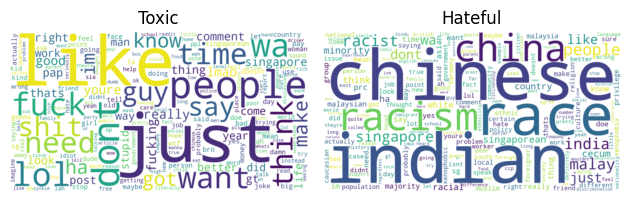

In [15]:
# Loop through the DataFrames to generate word clouds
for i, (df, title) in enumerate(dataframes):
    # Create TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess, stop_words='english', min_df=1, max_features=500)

    # Fit and transform the data
    df['text'] = df['text'].fillna('')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'].values)

    # Sum the TF-IDF scores for each term across all documents
    tfidf_sum = tfidf_matrix.sum(axis=0)

    # Create a DataFrame to hold the words and their corresponding scores
    words = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_sum.A1  # Convert to a 1D array

    # Create a dictionary mapping words to their TF-IDF scores
    word_scores = dict(zip(words, tfidf_scores))

    # Generate the word cloud
    wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='viridis').generate_from_frequencies(word_scores)

    # Display the word cloud
    plt.subplot(1, 2, i + 1)  # Create a subplot for each word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(title)

# Show the plots
plt.tight_layout()
plt.show()

In the Toxic but not Hateful WordCloud, there are generic words like, 'want', 'time', 'need', 'people', 'think', 'say', together with some swear words.

In the Hateful but not Toxic WordCloud, the most repeated words are race and country related, like 'chinese', 'indian', 'malay', 'china', 'india'.